
# Early-layer saliency dataset overview
Quick sanity notebook to inspect the early-layer saliency dumps under `saliency_datasets/early_layers`.


In [2]:

import json
import os
from pathlib import Path
import glob

import torch
import pandas as pd
import matplotlib.pyplot as plt

# Adjust the path based on your actual directory structure
BASE_DIR = Path('saliency_datasets') / 'early_layers'
# If the above doesn't work, try an absolute path or check the correct relative path
if not BASE_DIR.exists():
	print(f"Path does not exist: {BASE_DIR}")
	print(f"Current working directory: {Path.cwd()}")
	# Try alternative paths
	alt_paths = [
		Path('..') / 'saliency_datasets' / 'early_layers',
		Path('../..') / 'saliency_datasets' / 'early_layers',
	]
	for alt_path in alt_paths:
		if alt_path.exists():
			BASE_DIR = alt_path
			break
assert BASE_DIR.exists(), f"Could not find BASE_DIR at {BASE_DIR}"


Path does not exist: saliency_datasets/early_layers
Current working directory: /home/arnav_eph/practice/SGRel-DiT: Scene Graph–Aware Relation Analysis in Diffusion Transformers/relation-analysis/relation_analysis



## Classes available
Each class folder contains a `class_info.json` plus multiple `sample_XXXX.pt` files. We list what is present on disk and compare with the counts declared in `class_info.json`.


In [3]:

records = []
for class_dir in sorted(BASE_DIR.glob('class_*')):
    info_path = class_dir / 'class_info.json'
    with info_path.open() as f:
        info = json.load(f)
    sample_files = sorted(class_dir.glob('sample_*.pt'))
    records.append({
        'class_dir': class_dir.name,
        'class_id': info.get('class_id'),
        'predicate': info.get('predicate'),
        'declared_num_samples': info.get('num_samples'),
        'actual_files': len(sample_files),
        'layer_config': info.get('layer_config'),
        'layer_indices': info.get('layer_indices'),
    })

class_df = pd.DataFrame(records).sort_values('class_id').reset_index(drop=True)
class_df


,class_dir,class_id,predicate,declared_num_samples,actual_files,layer_config,layer_indices
0,class_00_above,0,above,175,700,early_layers,"[0, 1, 2, 3, 4, 5, 6]"
1,class_01_around_near,1,around/near,175,700,early_layers,"[0, 1, 2, 3, 4, 5, 6]"
2,class_02_behind,2,behind,175,700,early_layers,"[0, 1, 2, 3, 4, 5, 6]"
3,class_03_below,3,below,175,700,early_layers,"[0, 1, 2, 3, 4, 5, 6]"
4,class_04_carrying,4,carrying,175,700,early_layers,"[0, 1, 2, 3, 4, 5, 6]"
5,class_05_drinking,5,drinking,175,700,early_layers,"[0, 1, 2, 3, 4, 5, 6]"
6,class_06_eating,6,eating,233,700,early_layers,"[0, 1, 2, 3, 4, 5, 6]"
7,class_07_hanging from,7,hanging from,175,700,early_layers,"[0, 1, 2, 3, 4, 5, 6]"
8,class_08_holding,8,holding,175,700,early_layers,"[0, 1, 2, 3, 4, 5, 6]"
9,class_09_in,9,in,175,700,early_layers,"[0, 1, 2, 3, 4, 5, 6]"



## Inspect a single sample
Pick one `.pt` file and unpack its fields to understand the tensor shapes and metadata stored per sample.


In [4]:

# Choose a sample (adjust path to inspect other classes)
sample_path = BASE_DIR / 'class_02_behind' / 'sample_0000.pt'
sample = torch.load(sample_path)

print('Keys:', list(sample.keys()))
for key, value in sample.items():
    if isinstance(value, torch.Tensor):
        print(f"{key:>20}: tensor shape={tuple(value.shape)}, dtype={value.dtype}")
    else:
        print(f"{key:>20}: {type(value).__name__} -> {value}")


Keys: ['saliency_maps', 'cross_attention_maps', 'prompt', 'concepts', 'class_id', 'predicate', 'sample_id', 'layer_config', 'layer_indices', 'metadata']
       saliency_maps: tensor shape=(3, 32, 32), dtype=torch.float32
cross_attention_maps: tensor shape=(3, 32, 32), dtype=torch.float32
              prompt: str -> a photo of parking meter behind man on a plain background
            concepts: list -> ['parking meter', 'behind', 'man']
            class_id: int -> 2
           predicate: str -> behind
           sample_id: int -> 0
        layer_config: str -> early_layers
       layer_indices: list -> [0, 1, 2, 3, 4, 5, 6]
            metadata: dict -> {'subject': 'parking meter', 'predicate': 'behind', 'object': 'man', 'relation_type': 'geometric', 'source_image_id': 1, 'source_relationship_id': 3186256}


/tmp/ipykernel_203000/2850000276.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sample = torch.load(sample_path)



### Visualize saliency vs cross-attention map
Both tensors are shaped `[num_concepts, H, W]`; here `num_concepts=3`. Plotting the per-concept heatmaps helps confirm alignment and relative intensities.


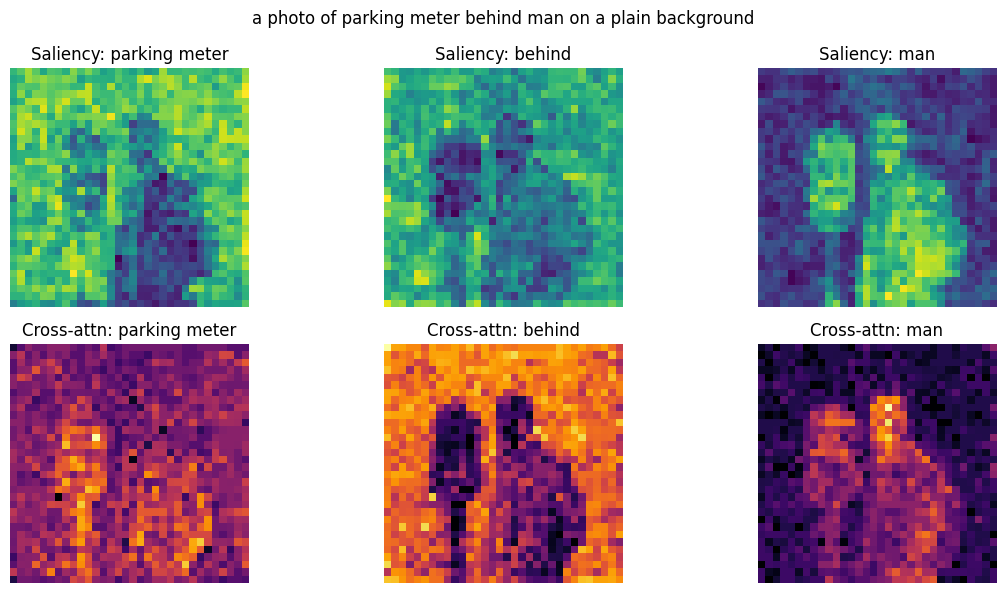

In [5]:

# Quick visualization for the chosen sample
saliency = sample['saliency_maps']
attn = sample['cross_attention_maps']
concepts = sample['concepts']

fig, axes = plt.subplots(2, saliency.shape[0], figsize=(4 * saliency.shape[0], 6))
for idx, concept in enumerate(concepts):
    axes[0, idx].imshow(saliency[idx].cpu(), cmap='viridis')
    axes[0, idx].set_title(f'Saliency: {concept}')
    axes[0, idx].axis('off')

    axes[1, idx].imshow(attn[idx].cpu(), cmap='inferno')
    axes[1, idx].set_title(f'Cross-attn: {concept}')
    axes[1, idx].axis('off')

fig.suptitle(sample['prompt'])
fig.tight_layout()



## Metadata fields summary
Check which metadata keys appear and how often by sampling one file from each class.


In [6]:

meta_rows = []
for _, row in class_df.iterrows():
    class_dir = BASE_DIR / row['class_dir']
    first_sample = sorted(class_dir.glob('sample_*.pt'))[0]
    data = torch.load(first_sample)
    meta_rows.append({
        'class_dir': row['class_dir'],
        'predicate': row['predicate'],
        'metadata_keys': sorted(list(data.get('metadata', {}).keys())),
        'concepts': data.get('concepts'),
    })

pd.DataFrame(meta_rows)


/tmp/ipykernel_203000/1528397800.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(first_sample)


,class_dir,predicate,metadata_keys,concepts
0,class_00_above,above,"[object, predicate, relation_type, source_imag...","[parking meter, above, street]"
1,class_01_around_near,around/near,"[object, predicate, relation_type, source_imag...","[sidewalk, near, street]"
2,class_02_behind,behind,"[object, predicate, relation_type, source_imag...","[parking meter, behind, man]"
3,class_03_below,below,"[object, predicate, relation_type, source_imag...","[computer tower, below, desktop]"
4,class_04_carrying,carrying,"[object, predicate, relation_type, source_imag...","[man, carrying, umbrella]"
5,class_05_drinking,drinking,"[object, predicate, relation_type, source_imag...","[bird, drinking, water]"
6,class_06_eating,eating,"[object, predicate, relation_type, source_imag...","[people, eating, food]"
7,class_07_hanging from,hanging from,"[object, predicate, relation_type, source_imag...","[fringe, hanging from, shawl]"
8,class_08_holding,holding,"[object, predicate, relation_type, source_imag...","[man, holding, chin]"
9,class_09_in,in,"[object, predicate, relation_type, source_imag...","[man, in, shirt]"
